### Section-1

#### part 1

In [ ]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read an image
img = cv2.imread('cat.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show an image
plt.imshow(img_rgb)
plt.title("off")

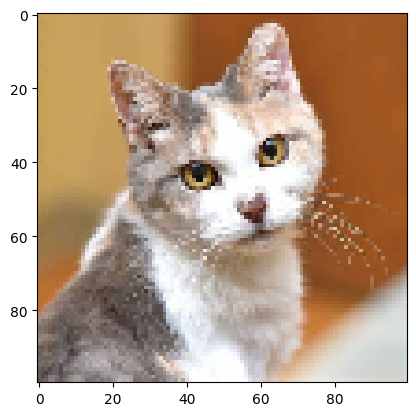

In [93]:
# resize the image
img_resized = cv2.resize(img_rgb, (100, 100))
cv2.write('cat_resized.jpg', img_resized)

plt.imshow(img_resized)

### Section-2

#### part-1

In [ ]:
# convert video into images 

# read the video

def convert_vid_to_images(output_path, input_path):
    vid = cv2.VideoCapture(input_path)

    # create a folder to store the images
    if not os.path.exists('output_folder'):
        os.makedirs('output_folder')
    
    # extract the frames
    currentframe = 0
    while(True):
        # read from frame
        ret, frame = vid.read()

        if ret:
            # if video is still left continue creating images
            # using module os

            name = 'frame' + str(currentframe) + '.jpg'
            # print('Creating...' + name)

            # write the extracted images and save it to output path
            cv2.imwrite(os.path.join(output_path, name), frame)
            # cv2.imwrite(name, frame)

            # increase counter so that it will show how many frames are created
            currentframe += 1
        else:
            break

In [ ]:
output_folder = "./tom&jerry/"
input_path = "./Tom&Jerry.mp4"

convert_vid_to_images(output_folder, input_path)

In [ ]:
out_oswald = "./oswald_imgs/"
input_oswald = "./Oswald.mp4"

convert_vid_to_images(out_oswald, input_oswald)

In [ ]:
# convert images into video

def convert_images_to_vid(output_path, input_path, fps = 30):

    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    img_files = [f for f in os.listdir(input_path) if f.endswith('.jpg')]
    img_files.sort()

    img_0 = cv2.imread(os.path.join(input_path, img_files[0]))
    height, width, _ = img_0.shape 

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))  

    print(f"Merging images into video. Frame rate: {fps}")

    for img in img_files:
        img_path = os.path.join(input_path, img)
        frame = cv2.imread(img_path)
        out.write(frame)
    
        
    out.release 
    # print(f"Final Video: {output_path}")
    # write the formed output in the given output path


In [ ]:
def img_to_vid(output_path, input_path, fps = 30):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    img_files = [f for f in os.listdir(input_path) if f.endswith('.jpg')]
    img_files.sort()
    img_0 = cv2.imread(os.path.join(input_path, img_files[0]))
    height, width, _ = img_0.shape 

    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for j in range(0, 5):
        img = cv2.imread(os.path.join(input_path, img_files[j]))
        out.write(img)
    
    cv2.destroyAllWindows()
    out.release()

In [ ]:
output_folder = "./oswald_vid.mp4"
input_path = "./oswald_imgs/"

img_to_vid(output_folder, input_path)

#### part-2

In [ ]:
# capture frames from a webcam and save them in a folder
# stop after 5 clicks


def capture_frames_webcam(output_path):
    # opens the inbuilt camera of laptop to capture video 
    cap = cv2.VideoCapture(0)
    i = 0

    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    currentframe = 0
    rows = 2
    columns = 2
    fig = plt.figure(figsize=(10, 7))

    for i in range(5):
        ret, frame = cap.read()
    
        cv2.imwrite('frame' + str(i) + '.png', frame)
        currentframe += 1

        fig.add_subplot(rows, columns, 1)
        # change color from BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.axis('off')

    print(currentframe)
    # del(cap)
    cap.release
    cv2.destroyAllWindows()

In [ ]:
output_path = "./webcam/"

# capture_frames_webcam(output_path)

#### part-3

In [91]:
# using chroma-keying, create an interesting composite of two videos using this technique 

chroma_color = (0, 255, 0)

def chroma_keying(output_path, bg_vid, fg_vid):
    bg = cv2.VideoCapture(bg_vid)
    fg = cv2.VideoCapture(fg_vid)

    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    fps = int(bg.get(cv2.CAP_PROP_FPS))
    width = int(bg.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(bg.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(os.path.join(output_path, "output_video.mp4"), fourcc, fps, (width, height))
    # out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print("fps: ", fps, "Resolution: ", width, "x", height)

    bg_subtractor = cv2.createBackgroundSubtractorMOG2(history = 100, varThreshold = 50, detectShadows = True)

    while(True):
        # read from frame
        ret_bg, frame_bg = bg.read()
        ret_fg, frame_fg = fg.read()

        if not ret_bg or not ret_fg:
            break

        frame_fg = cv2.resize(frame_fg, (width, height)) # resize the foreground video to match the background video
        frame_bg = cv2.resize(frame_bg, (width, height)) # resize the background video to match the foreground video

        # binary mask for the foreground video
        mask = bg_subtractor.apply((frame_fg))
        # mask = cv2.bitwise_not(cv2.inRange(frame_fg, np.array([0, 200, 0]), np.array([0, 206, 0])))
        # mask = cv2.erode(mask, cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9)))
        # mask = cv2.inRange(frame_fg, chroma_color, chroma_color)
        inv_mask = cv2.bitwise_not(mask) # inverting the mask to select bg

        # extracting fg and bg using masks 
        foreground = cv2.bitwise_and(frame_fg, frame_fg, mask=mask)
        background = cv2.bitwise_and(frame_bg, frame_bg, mask=inv_mask)

        # res = cv2.add(background, foreground)
        alpha = 0.7
        res = cv2.addWeighted(background, 1, foreground, 1, 0)
        # out.write(res)
       
        # show the output video 
        cv2.imshow('Output Video:', res)

        out.write(res)

        # save the output video in a folder 
        # final_vid = cv2.imwrite(os.path.join(output_path, res))
        # out.write(final_vid)

        if(cv2.waitKey(30) & 0xFF == ord('q')):
            break   

  
    # del(cap)
    bg.release
    fg.release
    out.release()
    cv2.destroyAllWindows()
    

In [92]:
bg_path = "./bg_file.mp4"
fg_path = "./fg_file.mp4"

output_path = "./chroma_keying_out/"

chroma_keying(output_path, bg_path, fg_path)

fps:  29 Resolution:  854 x 480
